# Data Import

In [6]:
import pandas as pd

df = pd.read_csv("low_back_pain_prior_auth_dataset.csv")

# Data Exploration

In [8]:
df["target"] = (df["decision_status"] == "Denied").astype(int)

In [10]:
features = [
    "age",
    "gender",  # needs encoding
    "procedure_code",  # needs encoding
    "provider_type",  # needs encoding
    "prior_conservative_care"  # convert Yes/No to 1/0
]

# Data Cleaning

In [12]:
df_clean = df[features + ["target"]].copy()

# Encode binary and categorical variables
df_clean["prior_conservative_care"] = df_clean["prior_conservative_care"].map({"Yes": 1, "No": 0})
df_clean["gender"] = df_clean["gender"].map({"Male": 1, "Female": 0})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_clean, columns=["procedure_code", "provider_type"], drop_first=True)

# Feature Engineering & Data Model Training

In [14]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[147  16]
 [ 32   5]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       163
           1       0.24      0.14      0.17        37

    accuracy                           0.76       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.71      0.76      0.73       200



# Visualsation

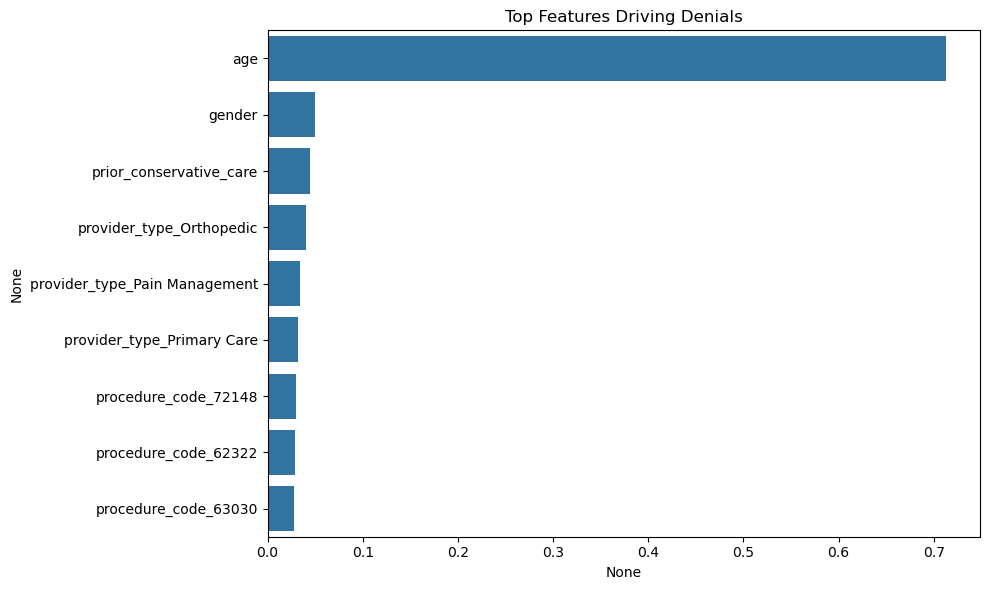

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Top Features Driving Denials")
plt.tight_layout()
plt.show()